# Car price prediction on used car


Fetch data

In [34]:
import os
import pandas as pd

CAR_PATH = "archive"

train_data_file_name = "X_train.csv"
test_data_file_name = "X_test.csv"

train_label_file_name = "y_train.csv"
test_label_file_name = os.path.join("test_label","y_test.csv")

def load_car_data(file_path, car_path=CAR_PATH):
    csv_path = os.path.join(car_path, file_path)
    return pd.read_csv(csv_path)




Create the the train and test test. (They are already separated)

In [35]:
car_train = load_car_data(train_data_file_name)
car_test = load_car_data(test_data_file_name)

car_train_label = load_car_data(train_label_file_name)
car_test_label = load_car_data(test_label_file_name)

print(car_train_label)


      carID  price
0     13207  31995
1     17314   7700
2     12342  58990
3     13426  12999
4     16004  16990
...     ...    ...
4955  16898  17999
4956  14416  28900
4957  15453   8998
4958  14666  23198
4959  15135  14900

[4960 rows x 2 columns]


C:\Users\jeanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


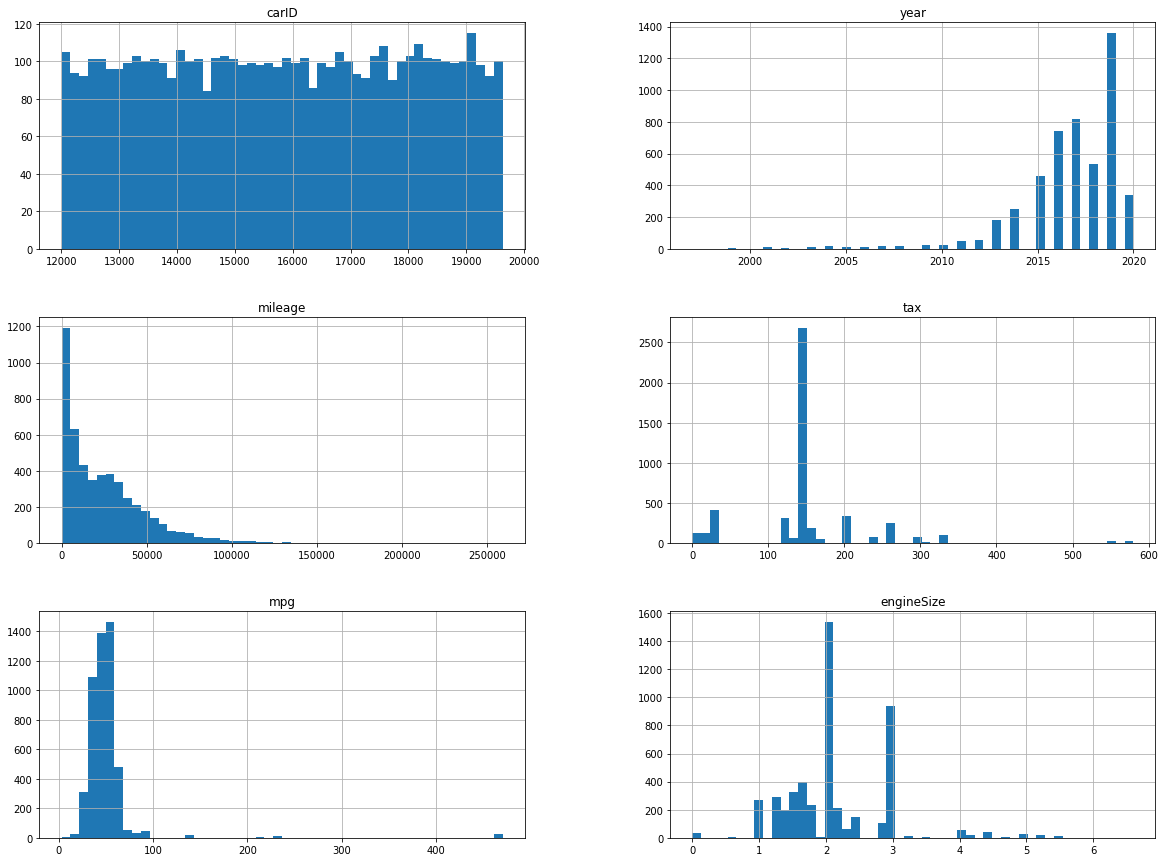

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

car_train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='brand', ylabel='tax'>

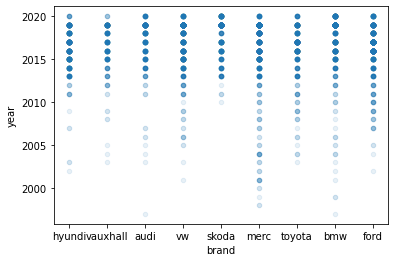

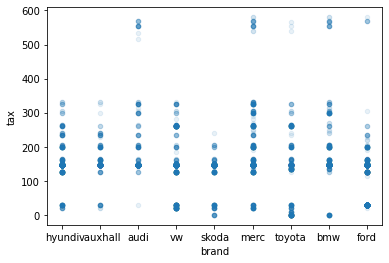

In [37]:
car_train.plot(kind="scatter", x="brand", y="year", alpha=0.1)
car_train.plot(kind="scatter", x="brand", y="tax", alpha=0.1)

# Data cleaning

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

car_num = car_train.drop(["brand", "model", "transmission", "fuelType"], axis=1)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
('std_scaler', StandardScaler()),
])

cat_attribs = ["brand", "model", "transmission", "fuelType"]
car_train_num = num_pipeline.fit_transform(car_num)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(car_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

car_prepared = full_pipeline.fit_transform(car_train)
car_labels = car_train_label.drop('carID', axis=1)
print(car_labels)


      price
0     31995
1      7700
2     58990
3     12999
4     16990
...     ...
4955  17999
4956  28900
4957   8998
4958  23198
4959  14900

[4960 rows x 1 columns]


# Train a model

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

forest_reg = RandomForestRegressor()

forest_reg.fit(car_prepared, car_labels)

car_prediction  = forest_reg.predict(car_prepared)
forest_mse = mean_squared_error(car_labels, car_prediction)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

print("Train accuracy of RandomForestRegressor : ", round(100*forest_reg.score(car_prepared, car_labels), 2), '%')



C:\Users\jeanj\AppData\Local\Temp/ipykernel_18944/2978701364.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(car_prepared, car_labels)


1272.7601283439456
Train accuracy of RandomForestRegressor :  99.4 %


# Evaluate system on test set

In [42]:
X_test_prepared = full_pipeline.transform(car_test)
y_test = car_test_label.drop("carID", axis=1).copy()

final_predictions = forest_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final_rmse")

print("Test accuracy of RandomForestRegressor : ", round(100*forest_reg.score(X_test_prepared, y_test), 2), '%')


final_rmse
Test accuracy of RandomForestRegressor :  95.85 %
